## Model Training

### 1.1 Import Data and Required Packages

Importing Pandas, Numnpy, Matplotlib, Seaborn and warnings Library.

In [1]:
# Basci Import 

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,Not,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,Not,90,95,93
3,male,group A,associate's degree,free/reduced,Not,47,57,44
4,male,group C,some college,standard,Not,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'], axis =1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,Not,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,Not,95,93
3,male,group A,associate's degree,free/reduced,Not,57,44
4,male,group C,some college,standard,Not,78,75


In [5]:
print("Categories in 'gender' variable:      ",end=' ' )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=' ' )
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=' ' )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=' ' )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=' ' )
print(df['test_preparation_course'].unique())



Categories in 'gender' variable:       ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['Not' 'completed']


In [6]:

y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numberic_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numberic_transformer, num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
# separate dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true, predicted):
    """
    Function to evaluate the model performance using RMSE, MAE and R2 score
    """
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
}

model_list = []
Root_Mean_Squared_Error = [] 
Mean_Absolute_Error = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    
    print('---------------------------------------------------------------------------------')
    
    print("model Performance for Testing set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    
    Root_Mean_Squared_Error.append(model_test_rmse)
    Mean_Absolute_Error.append(model_test_mae)
    r2_list.append(model_test_r2)
    
    print('-'*35)
    print('\n')
    
    

Linear Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
---------------------------------------------------------------------------------
model Performance for Testing set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
-----------------------------------


lasso Regression
Model Performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------------------------------------------------------------
model Performance for Testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
-----------------------------------


Ridge Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------------------------------------------------
model Performance for Testing set
- Ro

### Results

In [13]:
pd.DataFrame(list(zip(model_list, Root_Mean_Squared_Error,Mean_Absolute_Error,r2_list)),
             columns=['Model Name', 'R2_Score', 'Root_Mean_Squared_Error','Mean_Absolute_Error']).sort_values(
                 by=['R2_Score', 'Root_Mean_Squared_Error','Mean_Absolute_Error'], ascending=False)

,Model Name,R2_Score,Root_Mean_Squared_Error,Mean_Absolute_Error
4,Decision Tree Regressor,7.781709,6.225000,0.751149
3,KNeighbors Regressor,7.253041,5.621000,0.783813
1,lasso Regression,6.519695,5.157882,0.825320
6,AdaBoost Regressor,6.123783,4.824166,0.845891
7,CatBoost Regressor,6.008632,4.612532,0.851632
5,Random Forest Regressor,5.959366,4.611750,0.854055
0,Linear Regression,5.393994,4.214763,0.880433
2,Ridge Regression,5.390387,4.211101,0.880593


### Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" % score)

 Accuracy of the model is 88.04


### Plot y_pred and y_test

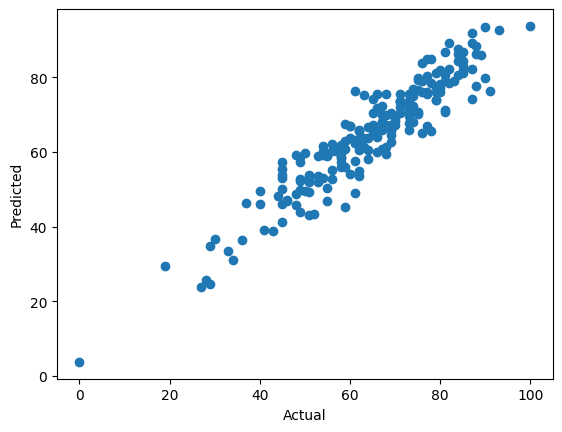

In [15]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

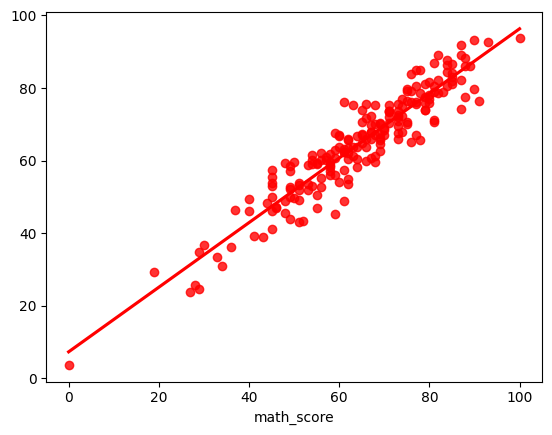

In [16]:
sns.regplot(x=y_test, y=y_pred,ci =None, color = 'red');

### Difference between Actual and Predicted Values

In [17]:
pred_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
